# Algorithms (Linear Regression)

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
%matplotlib inline

#Ambos aceitam qualquer quantidades de atributos.

class GradientDescent():
    def __init__(self, X, Y, alpha, epoch):
        self.x     = self.Config(X)
        self.y     = Y
        self.w     = np.random.rand(1, X.shape[1]+1)
        self.epoch = epoch
        self.cost  = np.zeros(self.epoch)
        for i in range(epoch):
            self.w = self.w - (alpha/len(self.x))*np.sum((self.x@self.w.T-self.y)*self.x, axis=0)
            self.cost[i] = self.Custo()
        self.error  = self.cost[epoch-1]
        
    def Config(self, X):
        new = np.ones([X.shape[0],1])
        return np.concatenate((new,X) , axis=1)
    
    def Custo(self):
        self.m = len(self.x)
        erro   = (self.x@self.w.T - self.y)
        custo  = np.sum(np.power(erro,2))
        return custo/self.m
    
    def Plot(self):
        fig, ax = plt.subplots()  
        ax.plot(np.arange(self.epoch), self.cost, 'r')  
        ax.set_xlabel('Iterações')
        ax.set_ylabel('Custo')
        ax.set_title('Curva de Erro')
        
    def GetW(self):
        print("\nValores de W:", self.w, "\n")
    
    def FinalError(self):
        print("\nErro final de treino:", self.error, "\n")
        
    def Predict(self, X_Test):
        self.x_test = self.Config(X_Test)
        self.y_pred = self.x_test@self.w.T
        
    def Score(self, Y_Test):
        score = r2_score(self.y_pred, Y_Test)
        print("\nScore: {}, ou aproximadamente {}% de Precisão\n".format(score, round(score*100, 2)))
        plt.figure(figsize=(15,10))
        plt.scatter(Y_Test, self.y_pred)
        plt.xlabel("y_test")        
        plt.ylabel("y_pred")        
        plt.title("Comparação: Dados Atuais vs Dados de Predição.")
        
        
        
        
class AnalyticalSolution():
    def __init__(self, X, Y):
        self.x = self.Config(X)
        self.y = Y
        self.w = np.linalg.inv(self.x.T@self.x) @ self.x.T @ self.y
    
    def Config(self, X):
        new = np.ones([X.shape[0],1])
        return np.concatenate((new,X), axis=1)
    
    def GetW(self):
        print("\nValores de W:", self.w.T, "\n")
    
    def Predict(self, X_Test):
        self.x_test = self.Config(X_Test)
        self.y_pred = self.x_test@self.w
    
    def Score(self, Y_Test):
        score = r2_score(self.y_pred, Y_Test)
        print("Score: {}, ou aproximadamente {}% de Precisão\n.".format(score, round(score*100, 2)))
        plt.figure(figsize=(15,10))
        plt.scatter(Y_Test, self.y_pred)
        plt.xlabel("y_test")
        plt.ylabel("y_pred")
        plt.title("Comparação: Dados Atuais vs Dados de Predição")

# Import dataset and prepare (UCI: Combined Cycle Power Plant)

In [2]:
#Read file -> https://archive.ics.uci.edu/ml/datasets/combined+cycle+power+plant
data = pd.read_csv("Sheet.csv")
data

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [3]:
#Define X, Y, and normalization
data_norm = (data-data.mean())/data.std()

X = data_norm.drop(['PE'],axis=1).values
Y = data_norm.iloc[:, 4:5].values

print("Valores X:")
print(X)
print("\nValores Y:")
print(Y)

#Training and test set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

Valores X:
[[-0.62948649 -0.98724499  1.82039326 -0.00951886]
 [ 0.74187034  0.68100953  1.14180313 -0.97456958]
 [-1.95119536 -1.17295634 -0.18506789  1.2897723 ]
 ...
 [ 1.5657579   1.57572906 -0.05709556 -2.5224863 ]
 [ 0.64794179  1.19171575  0.10118601 -0.74786143]
 [ 0.2614929   0.64638538  0.66864227 -0.37252587]]

Valores Y:
[[ 0.52118083]
 [-0.58563382]
 [ 2.00357418]
 ...
 [-1.45280463]
 [-1.09128815]
 [-0.06357355]]


# Gradient Descent


Valores de W: [[ 6.06984898e-04 -6.87115854e-01 -3.04647788e-01  5.63812613e-02
  -7.86002333e-02]] 


Erro final de treino: 0.07690563217503057 



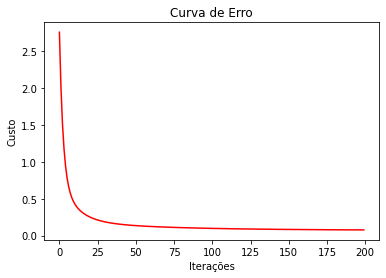

In [4]:
GD = GradientDescent(x_train, y_train, 0.08, 200)
GD.GetW()
GD.FinalError()
GD.Plot()


Score: 0.9165098973462014, ou aproximadamente 91.65% de Precisão



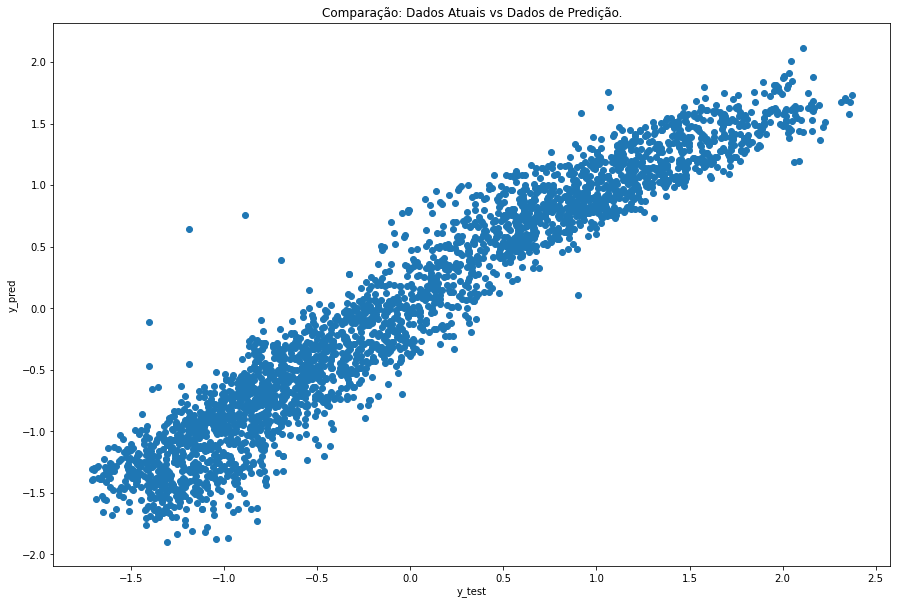

In [5]:
GD.Predict(x_test)
GD.Score(y_test)

# Analytical Solution


Valores de W: [[-6.58940798e-05 -8.57740307e-01 -1.78774986e-01  2.36654827e-02
  -1.33840791e-01]] 

Score: 0.9252876859243366, ou aproximadamente 92.53% de Precisão
.


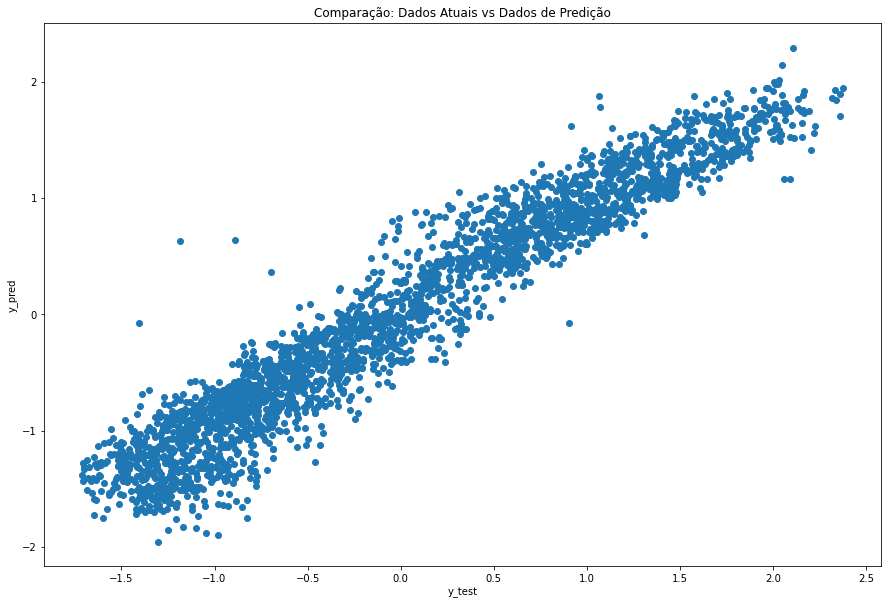

In [6]:
AS = AnalyticalSolution(x_train, y_train)
AS.GetW()
AS.Predict(x_test)
AS.Score(y_test)